# PCA 예제

## 라이브러리 불러오기

In [24]:
## Import modules
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

## 데이터 불러오기
### BreastCancerWisconsin

In [3]:
data = pd.read_csv("BreastCancerWisconsin.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 569 rows and 31 columns.
- Column names:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


## X / Y로 데이터 분할 
### 1. X에 해당하는 전체 변수 (31개) 중 10개만을 선택하여 사용
### 2. Train / Test 으로 분할 (7:3)

In [5]:
X = data.drop(['diagnosis'], axis=1)
X = X.iloc[:, :10]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Train data를 기준으로 스케일링

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## PCA 모델 구축
### n_components는 만들어질 PCA의 축의 개수를 의미함

In [7]:
pca = PCA(n_components=None)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 구축된 PCA에 Train/Test set을 각각 적용 (축 변환)

In [22]:
Z_train = pca.transform(X_train)
print("- Shape of transformed data: ", Z_train.shape)

Z_test = pca.transform(X_test)
print("- Shape of transformed data: ", Z_test.shape)

- Shape of transformed data:  (398, 10)
- Shape of transformed data:  (171, 10)


## PCA 각 축에 대한 설명력 확인
### num_components : Component의 개수 
### exp_var : 각 component에 대한 설명력
### cum_exp_var : 각 component의 설명력의 누적합

In [13]:
num_components = pca.n_components_
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)

## 시각화를 통한 확인 (component별 설명력)

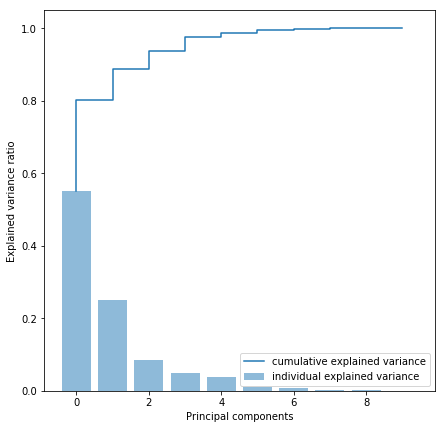

In [16]:
plt.figure(num=1, figsize=(7, 7))
plt.bar(range(num_components), exp_var, alpha=0.5, label='individual explained variance')
plt.step(range(num_components), cum_exp_var, label='cumulative explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

## Train data에 대한 scatter plot (2차원 / 3차원)
### 2차원 - PC1 / PC2

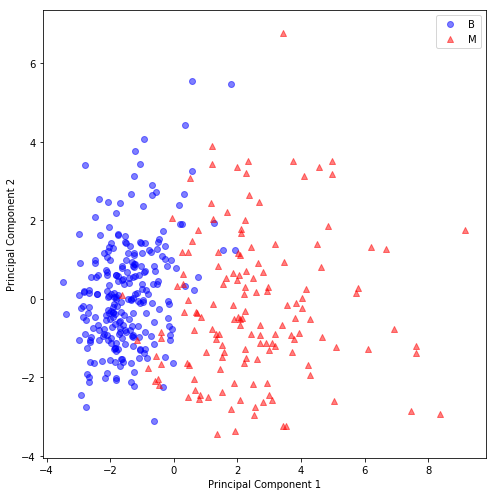

In [21]:
plt.figure(num=2, figsize=(7, 7))
for label, color, marker in zip(('B', 'M'), ('blue', 'red'), ('o', '^')):
    plt.scatter(Z_train[y_train == label, 0], Z_train[y_train == label, 1],
                label=label, color=color, marker=marker, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Train data에 대한 scatter plot (2차원 / 3차원)
### 3차원 - PC1 / PC2/ PC3

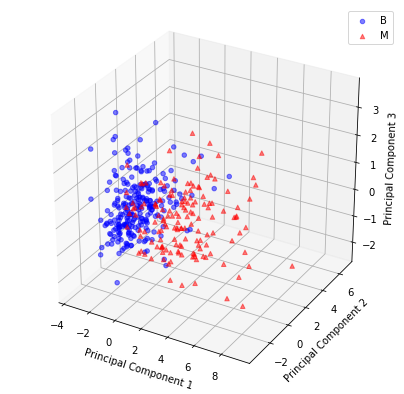

In [25]:
fig = plt.figure(num=3, figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
for label, color, marker in zip(('B', 'M'), ('blue', 'red'), ('o', '^')):
    ax.scatter(Z_train[y_train == label, 0], Z_train[y_train == label, 1],
               Z_train[y_train == label, 2], label=label, color=color,
               marker=marker, alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(loc='best')
plt.show(fig)

# ------------
# PCR 예제
## PCA에서 추출된 component를 사용하여 Logistic Regression 구축하기

#### -------------------------------------------------------
#### [TIP] sklearn은 문자에 대해 인식이 불가함 
#### 따라서 본 데이터내의 Target 값에 대한 변경이 필요

#### Target [diagnosis] 확인

In [27]:
print("- sample of 'y': ", y_train[:5])

- sample of 'y':  112    B
414    M
470    B
447    B
79     B
Name: diagnosis, dtype: object


#### sklearn에서 문자를 숫자로 매칭시켜주는 module을 지원함 (LabelEncoder)
#### 알파벳 순으로 매칭이 이뤄짐 (B = 0 / M = 1)

In [ ]:
le = LabelEncoder()
le.fit(y_train)

In [28]:
Y_train = le.transform(y_train)
Y_test = le.transform(y_test)

In [30]:
print("- sample of 'y': ", Y_train[:5])

- sample of 'y':  [0 1 0 0 0]


#### ----------------------------------------------------

### PCA component 2개만을 사용하여 Logistic regression을 수행

In [31]:
Z_sub_train = pd.DataFrame(Z_train[:,:2])
Z_sub_test = pd.DataFrame(Z_test[:,:2])

### Logistic Regression Model 구축

In [32]:
## Build LR model 
log_Z = LogisticRegression()
log_Z.fit(Z_sub_train, Y_train)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 예측 및 Confusion matrix 산출

In [36]:
## Predict & calculate score 
pred_score_Z = log_Z.score(Z_sub_test, Y_test)
pred_Z = log_Z.predict(Z_sub_test)
confusion_matrix(Y_test, pred_Z)

array([[104,   4],
       [  9,  54]], dtype=int64)

#### ----------------------------------------------------
### 기존 데이터 (변수 10개)를 사용하여 LR 구축 및 결과 비교

In [35]:
log_ori = LogisticRegression()
log_ori.fit(X_train, Y_train)

pred_score_ori = log_ori.score(X_test, Y_test)
pred_ori = log_ori.predict(X_test)
confusion_matrix(Y_test, pred_ori)

C:\Users\HQ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[102,   6],
       [  8,  55]], dtype=int64)

### 정확도 비교 (PCR-LR / LR)

In [37]:
pred_score_Z

0.9239766081871345

In [38]:
pred_score_ori

0.9181286549707602